In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [6]:
help(load_boston)

Help on function load_boston in module sklearn.datasets._base:

load_boston(*, return_X_y=False)
    Load and return the boston house-prices dataset (regression).
    
    ==============   ==============
    Samples total               506
    Dimensionality               13
    Features         real, positive
    Targets           real 5. - 50.
    ==============   ==============
    
    Read more in the :ref:`User Guide <boston_dataset>`.
    
    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : :class:`~sklearn.utils.Bunch`
        Dictionary-like object, with the following attributes.
    
        data : ndarray of shape (506, 13)
            The data matrix.
        target : ndarray of shape (506, )
            The regression target.
        file

In [10]:
df = load_boston()

In [16]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [15]:
df.feature_names 

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [17]:
df_b = pd.DataFrame(df.data,columns=df.feature_names )

In [18]:
df_b.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [94]:
X = df_b

In [95]:
y = pd.DataFrame(df.target,columns=['price'])

In [23]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [24]:
X.shape

(506, 13)

In [26]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [28]:
#first build the model with the given attributes
#then rescale the attributes then build the model
#then get the stats

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [34]:
lm = LinearRegression()

In [35]:
lm.fit(X_train,y_train)

LinearRegression()

In [40]:
pd.DataFrame(lm.coef_,columns=df.feature_names).T

,0
CRIM,-0.100100
ZN,0.047822
INDUS,0.040204
CHAS,3.299833
NOX,-16.648102
RM,4.180950
AGE,0.013149
DIS,-1.334497
RAD,0.322949
TAX,-0.013443


In [41]:
print("intercept {}".format(lm.intercept_))
print(pd.DataFrame(lm.coef_,columns=df.feature_names).T)

intercept [32.37653751]
                 0
CRIM     -0.100100
ZN        0.047822
INDUS     0.040204
CHAS      3.299833
NOX     -16.648102
RM        4.180950
AGE       0.013149
DIS      -1.334497
RAD       0.322949
TAX      -0.013443
PTRATIO  -0.902021
B         0.008024
LSTAT    -0.571722


In [42]:
y_pred = lm.predict(X_test)

In [43]:
y_pred.shape

(152, 1)

In [44]:
x=[i for i in range(1,153,1)]

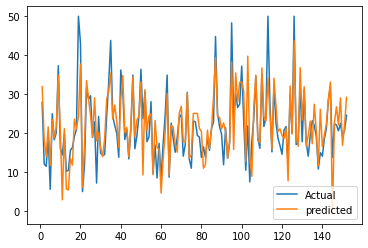

In [45]:
plt.plot(x,y_test)
plt.plot(x,y_pred)
plt.legend(['Actual','predicted'])

In [46]:
#metrics
from sklearn.metrics import r2_score,mean_squared_error

In [48]:
print(f"r2 score = {r2_score(y_test,y_pred)}")
print(f"mse = {mean_squared_error(y_test,y_pred)}")
print(f"rmse = {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2 score = 0.6568616717062785
mse = 27.085666123264684
rmse = 5.204389121046262


## rescale the data and run the model again

In [49]:
#mean = 0 and std = 1
from sklearn.preprocessing import StandardScaler

In [96]:
X2 = StandardScaler().fit_transform(X)

In [97]:
X2

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [55]:
lm2 = LinearRegression()

In [98]:
X2 = pd.DataFrame(X2,columns=df.feature_names) 

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size=0.3)

In [100]:
lm.fit(X_train,y_train)

LinearRegression()

In [101]:
pd.DataFrame(lm.coef_).T

,0
0,-0.889775
1,1.576883
2,-0.062347
3,0.170841
4,-2.054496
5,2.618088
6,-0.014670
7,-3.361732
8,3.264071
9,-2.692874


In [102]:
y_pred = lm.predict(X_test)

In [103]:
#after scaling the performance has increased a lot
print(f"r2 score = {r2_score(y_test,y_pred)}")
print(f"mse = {mean_squared_error(y_test,y_pred)}")
print(f"rmse = {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2 score = 0.698940889796285
mse = 23.367292343055592
rmse = 4.833972728828287


## rescale the target variable as well and see the model performance

In [62]:
y2 = StandardScaler().fit_transform(y)

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.3)

In [64]:
lm.fit(X_train,y_train)

LinearRegression()

In [65]:
y_pred = lm.predict(X_test)

In [67]:
#after scaling the performance has increased a lot
#r2 score has improved but it will be hard to explain the model
print(f"r2 score = {r2_score(y_test,y_pred)}")
print(f"mse = {mean_squared_error(y_test,y_pred)}")
print(f"rmse = {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2 score = 0.7430767557978434
mse = 0.28314640824752585
rmse = 0.532115032908793


## so going with lm2 model

In [69]:
import statsmodels.api as sm

In [104]:
# add constant
X_train = sm.add_constant(X_train)

C:\Users\Thiru\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [105]:
lm_sm_1 = sm.OLS(y_train,X_train).fit()

In [109]:
#correlation does not mean causation
#choose p values less than 0.05
lm_sm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     76.87
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           8.67e-93
Time:                        08:33:26   Log-Likelihood:                -1050.3
No. Observations:                 354   AIC:                             2129.
Df Residuals:                     340   BIC:                             2183.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.7001      0.257     88.304      0.000      22.194      23.206
CRIM          -0.8898      0.435     -2.044      0.042      -1.746      -0.033
ZN             1.5769      0.396      3.979      0.000       0.797       2.356
INDUS         -0.0623      0.506     -0.123      0.902      -1.059       0.934
CHAS           0.1708      0.259      0.659      0.510      -0.339       0.680
NOX           -2.0545      0.534     -3.848      0.000      -3.105      -1.004
RM             2.6181      0.335      7.804      0.000       1.958       3.278
AGE           -0.0147      0.431     -0.034      0.973      -0.862       0.833
DIS           -3.3617      0.511     -6.584      0.000      -4.366      -2.357
RAD            3.2641      0.717      4.551      0.000       1.853       4.675
TAX           -2.6929      0.788     -3.417      0.001      -4.243      -1.143
PTRATIO       -2.1148      0.345     -6.134      0.000      -2.793      -1.437
B              1.0178      0.296      3.442      0.001       0.436       1.599
LSTAT         -3.5629      0.430     -8.290      0.000      -4.408      -2.718
==============================================================================
Omnibus:                      128.181   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              549.732
Skew:                           1.515   Prob(JB):                    4.24e-120
Kurtosis:                       8.300   Cond. No.                         9.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
dir(lm_sm_1)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initia

In [124]:
lm_sm_1.pvalues[lm_sm_1.pvalues<=0.05].index

Index(['const', 'CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

In [126]:
#rebuilding the model with just these attributes
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size=0.3)

In [127]:
X2_new = X2[[ 'CRIM', 'ZN', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT']]

In [128]:
X_train,X_test,y_train,y_test = train_test_split(X2_new,y,test_size=0.3)

In [129]:
X_train_new = sm.add_constant(X_train)

C:\Users\Thiru\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [130]:
lm_sm_2 = sm.OLS(y_train,X_train_new).fit()

In [131]:
lm_sm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     100.8
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           9.26e-96
Time:                        08:45:02   Log-Likelihood:                -1051.0
No. Observations:                 354   AIC:                             2124.
Df Residuals:                     343   BIC:                             2167.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.3474      0.256     87.444      0.000      21.845      22.850
CRIM          -0.9500      0.301     -3.160      0.002      -1.541      -0.359
ZN             1.4791      0.382      3.868      0.000       0.727       2.231
NOX           -1.9625      0.480     -4.090      0.000      -2.906      -1.019
RM             2.2188      0.337      6.579      0.000       1.555       2.882
DIS           -3.7992      0.495     -7.668      0.000      -4.774      -2.825
RAD            2.8780      0.666      4.323      0.000       1.569       4.187
TAX           -2.4561      0.694     -3.538      0.000      -3.822      -1.091
PTRATIO       -2.1496      0.337     -6.371      0.000      -2.813      -1.486
B              0.8598      0.275      3.131      0.002       0.320       1.400
LSTAT         -4.0010      0.420     -9.531      0.000      -4.827      -3.175
==============================================================================
Omnibus:                      125.292   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              466.494
Skew:                           1.535   Prob(JB):                    5.04e-102
Kurtosis:                       7.712   Cond. No.                         8.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""